In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transaction_df = pd.read_excel("C:/Users/ADMIN/Documents/My projects/Customer-purchase-behavior-/QVI_transaction_data.xlsx")
purchase_behavior_df = pd.read_csv("C:/Users/ADMIN/Documents/My projects/Customer-purchase-behavior-/QVI_purchase_behaviour.csv")

In [40]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,1970-01-01 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,1970-01-01 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
purchase_behavior_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


## Data cleaning 

In [5]:
#Checking for missing values 
print(transaction_df.isnull().sum())
print(purchase_behavior_df.isnull().sum())
#There are no missing values

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [6]:
#Checking for duplicates
print(transaction_df.duplicated().sum())
print(purchase_behavior_df.duplicated().sum())

1
0


In [10]:
duplicated_rows = transaction_df[transaction_df.duplicated()]
print(duplicated_rows)

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
124845  43374        107          107024  108462        45   

                                     PROD_NAME  PROD_QTY  TOT_SALES  
124845  Smiths Thinly Cut   Roast Chicken 175g         2        6.0  


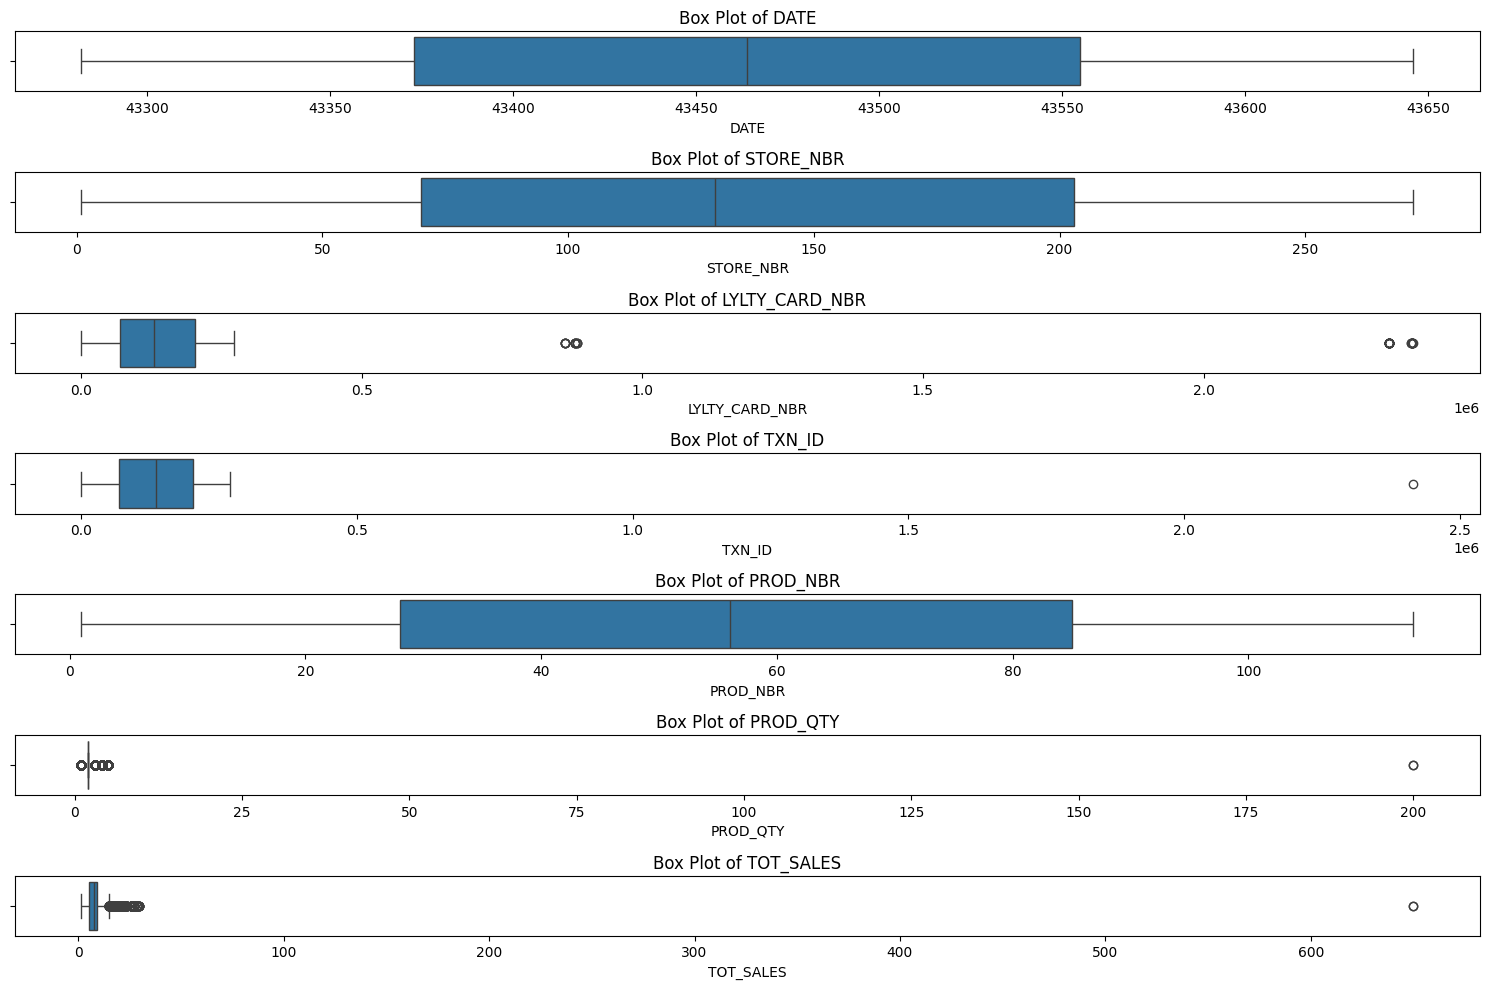

In [31]:
#Checking for outliers 
plt.figure(figsize=(15, 10))
# Loop through each numeric column and create a box plot
for i, column in enumerate(transaction_df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(len(transaction_df.select_dtypes(include=['float64', 'int64']).columns), 1, i + 1)
    sns.boxplot(x=transaction_df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


In [39]:
#Checking for data types 
print(transaction_df.dtypes)
print(purchase_behavior_df.dtypes)

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object
LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


In [38]:

transaction_df['DATE'] = pd.to_datetime(transaction_df['DATE'])


In [12]:
print(transaction_df.describe())
print(purchase_behavior_df.describe())

                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%     43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%     43555.000000     203.00000    2.030942e+05  2.027012e+05   
max     43646.000000     272.00000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7.400000  
75%        85.00

In [13]:
print(transaction_df.info())
print(purchase_behavior_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object

In [14]:
#merging the datasets
df = transaction_df.merge(purchase_behavior_df, on='LYLTY_CARD_NBR')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


## Exploratory Data analysis 

# Define Metrics and Explore Key Statistics

In [19]:
#Total sales 
total_sales = df['TOT_SALES'].sum()
print(f"Total Sales: {total_sales}")

Total Sales: 1934415.0000000002


In [ ]:
#Sales by LIFESTAGE and PREMIUM_CUSTOMER: Group data by LIFESTAGE and PREMIUM_CUSTOMER to analyze 
#purchasing patterns.
sales_by_segment = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
print(sales_by_segment)


                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   35514.80
1   MIDAGE SINGLES/COUPLES       Mainstream   90803.85
2   MIDAGE SINGLES/COUPLES          Premium   58432.65
3             NEW FAMILIES           Budget   21928.45
4             NEW FAMILIES       Mainstream   17013.90
5             NEW FAMILIES          Premium   11491.10
6           OLDER FAMILIES           Budget  168363.25
7           OLDER FAMILIES       Mainstream  103445.55
8           OLDER FAMILIES          Premium   81958.40
9    OLDER SINGLES/COUPLES           Budget  136769.80
10   OLDER SINGLES/COUPLES       Mainstream  133393.80
11   OLDER SINGLES/COUPLES          Premium  132263.15
12                RETIREES           Budget  113147.80
13                RETIREES       Mainstream  155677.05
14                RETIREES          Premium   97646.05
15          YOUNG FAMILIES           Budget  139345.85
16          YOUNG FAMILIES       Mainstream   92788.75
17        

In [29]:
df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [20]:
top_products = df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(10)
print(top_products)


PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
Cheezels Cheese 330g                        34296.9
Doritos Cheese      Supreme 330g            33390.6
Kettle Sweet Chilli And Sour Cream 175g     33031.8
Kettle Original 175g                        32740.2
Kettle Sea Salt     And Vinegar 175g        32589.0
Name: TOT_SALES, dtype: float64


In [21]:
bottom_products = df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).tail(10)
print(bottom_products)

PROD_NAME
WW Original Stacked Chips 160g              5323.8
WW Sour Cream &OnionStacked Chips 160g      5323.8
WW D/Style Chip     Sea Salt 200g           5249.7
Woolworths Cheese   Rings 190g              5169.6
Snbts Whlgrn Crisps Cheddr&Mstrd 90g        5076.2
WW Crinkle Cut      Chicken 175g            4702.2
Sunbites Whlegrn    Crisps Frch/Onin 90g    4600.2
WW Crinkle Cut      Original 175g           4532.2
Woolworths Mild     Salsa 300g              4234.5
Woolworths Medium   Salsa 300g              4050.0
Name: TOT_SALES, dtype: float64


# Data Visualization 

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns 

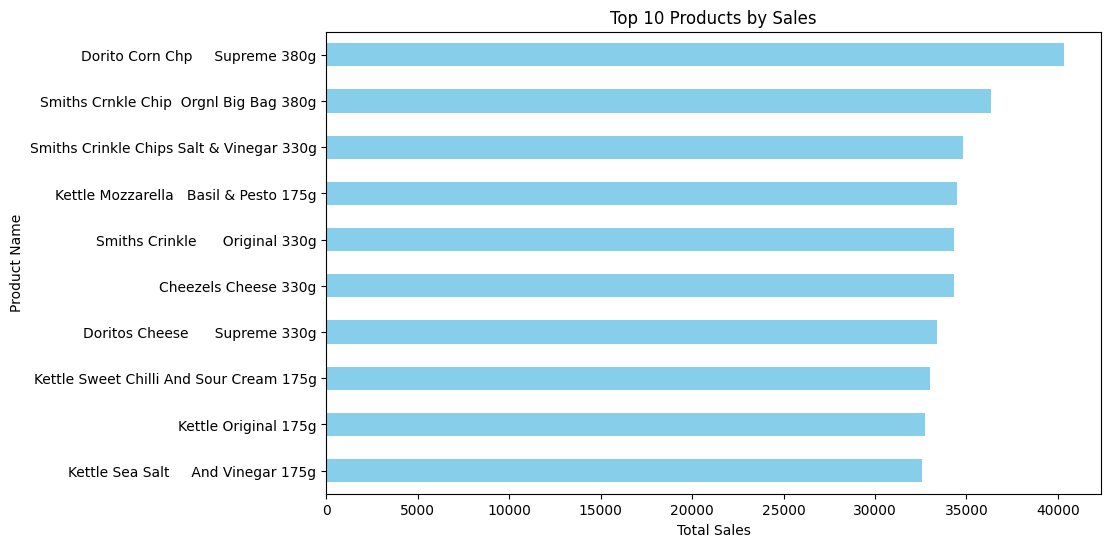

In [27]:
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='skyblue')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # Flip for better readability
plt.show()


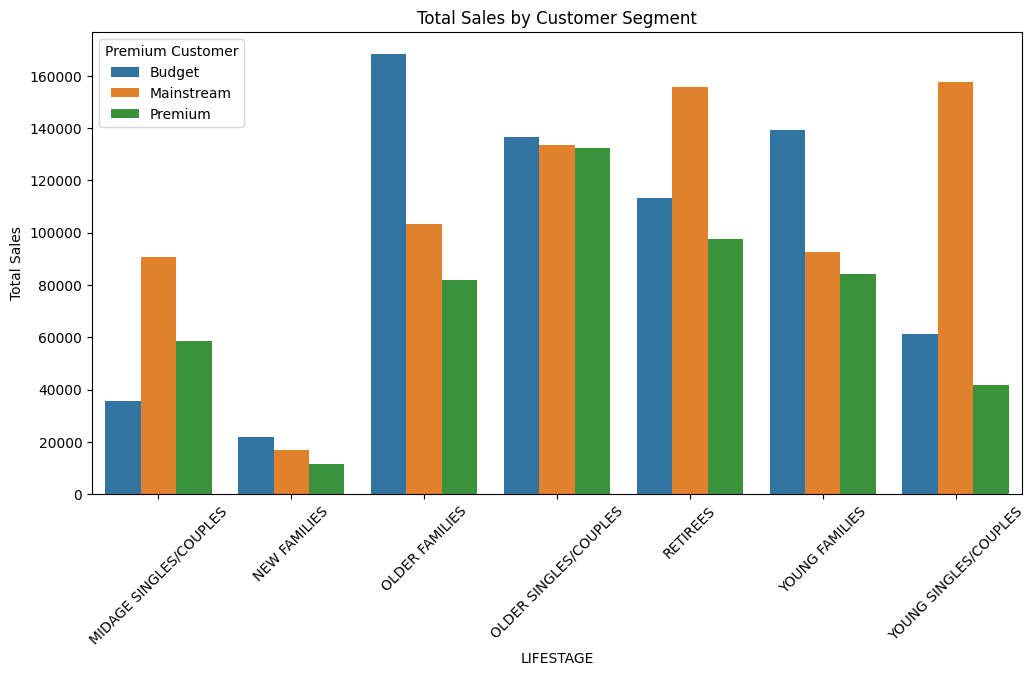

In [33]:
#Total Sales by Segment (LIFESTAGE and PREMIUM_CUSTOMER): 
# This bar plot will help visualize total sales across different customer segments.
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.show()


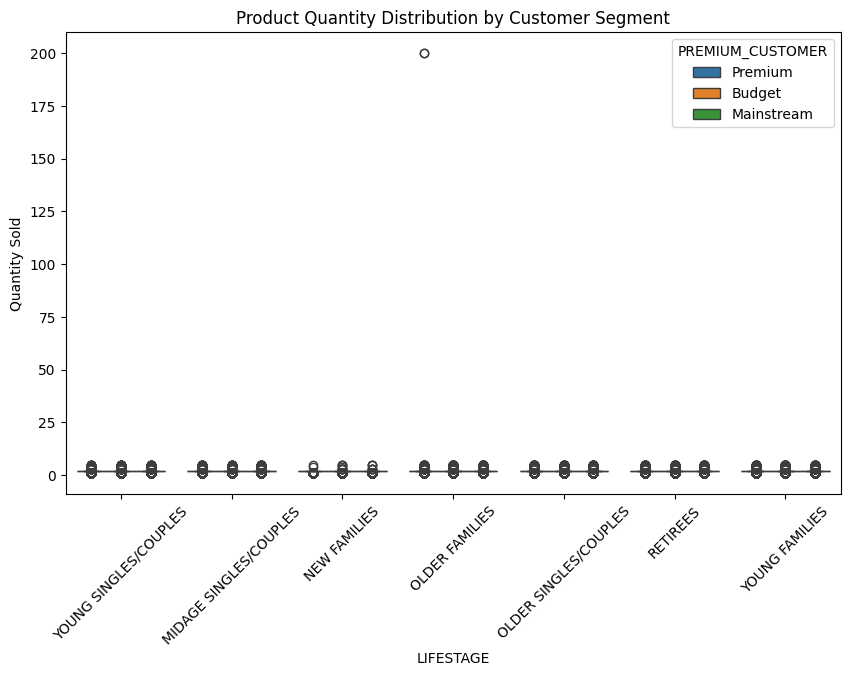

In [36]:
#Distribution of Transaction Quantity: Check if packet size correlates with customer segments.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER')
plt.title('Product Quantity Distribution by Customer Segment')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()
